In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [3]:
df=pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns=["Label","data"]
df.head()

,Label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#creating binary label
df['b_labels'] = df['Label'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [8]:
df_train,df_test,Ytrain,Ytest=train_test_split(df['data'],Y,test_size=0.33)

In [9]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [10]:
word2idx=tokenizer.word_index
V=len(word2idx)
print('Found %s unique tokens.' % V)


Found 7305 unique tokens.


In [11]:
#now we need to pad sequences so that we get a nxt matrix
data_train=pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)
T=data_train.shape[1]

Shape of data train tensor: (3733, 162)


In [12]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [13]:
D=20
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation='sigmoid')(x)

model=Model(i, x)

In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training Model......')
r=model.fit(
    data_train,
    Ytrain,
    epochs=5,
    validation_data=(data_test,Ytest)
)

Training Model......
Epoch 1/5
117/117 [==============================] - 15s 16ms/step - loss: 0.3812 - accuracy: 0.8636 - val_loss: 0.2390 - val_accuracy: 0.8706
Epoch 2/5
117/117 [==============================] - 1s 12ms/step - loss: 0.0998 - accuracy: 0.9622 - val_loss: 0.0799 - val_accuracy: 0.9761
Epoch 3/5
117/117 [==============================] - 1s 11ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.0671 - val_accuracy: 0.9842
Epoch 4/5
117/117 [==============================] - 1s 11ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0600 - val_accuracy: 0.9848
Epoch 5/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0665 - val_accuracy: 0.9842


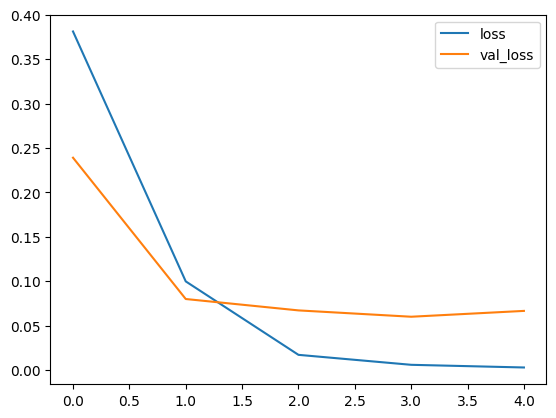

In [15]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

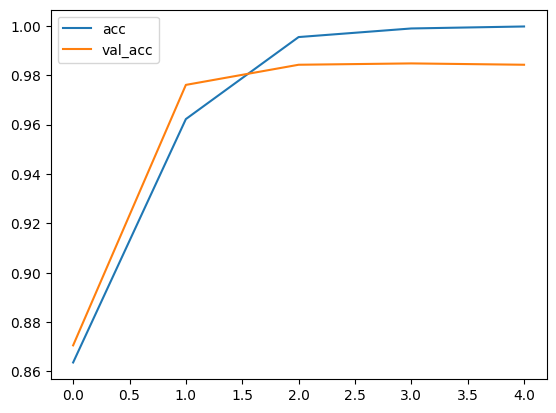

In [16]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()